<a href="https://colab.research.google.com/github/vicente-gonzalez-ruiz/linear_regression/blob/master/with_synthetic_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

In [0]:
# Dataset definition
features = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
labels = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

In [0]:
# Define a sequential model with tf.keras
model = tf.keras.models.Sequential()

In [0]:
# Structure (also called the topography) of the model (a single neuron, that is, a single node in a single layer)
model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

In [0]:
# Configure and compile the model
learning_rate = 0.14
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [20]:
# Train the model
epochs = 70
batch_size = 12
history = model.fit(x=features, y=labels, batch_size=batch_size, epochs=epochs)

Epoch 1/70
1/1 [==============================] - 0s 1ms/step - loss: 980.7772 - root_mean_squared_error: 31.3174
Epoch 2/70
1/1 [==============================] - 0s 1ms/step - loss: 765.3628 - root_mean_squared_error: 27.6652
Epoch 3/70
1/1 [==============================] - 0s 1ms/step - loss: 633.8879 - root_mean_squared_error: 25.1771
Epoch 4/70
1/1 [==============================] - 0s 1ms/step - loss: 537.3112 - root_mean_squared_error: 23.1800
Epoch 5/70
1/1 [==============================] - 0s 1ms/step - loss: 460.9060 - root_mean_squared_error: 21.4687
Epoch 6/70
1/1 [==============================] - 0s 987us/step - loss: 398.0137 - root_mean_squared_error: 19.9503
Epoch 7/70
1/1 [==============================] - 0s 981us/step - loss: 344.9781 - root_mean_squared_error: 18.5736
Epoch 8/70
1/1 [==============================] - 0s 1ms/step - loss: 299.5441 - root_mean_squared_error: 17.3073
Epoch 9/70
1/1 [==============================] - 0s 1ms/step - loss: 260.2061 - roo

In [21]:
# Get parameters of the training (remember that a lineal model only have a bias and a weight)
weight = model.get_weights()[0]
bias = model.get_weights()[1]
completed_epochs = history.epoch
history_per_epoch = pd.DataFrame(history.history)
print(history_per_epoch)
rmse = history_per_epoch["root_mean_squared_error"]

          loss  root_mean_squared_error
0   980.777161                31.317362
1   765.362793                27.665192
2   633.887939                25.177132
3   537.311157                23.179974
4   460.906036                21.468721
..         ...                      ...
65    1.116247                 1.056526
66    1.104177                 1.050798
67    1.092120                 1.045045
68    1.080108                 1.039283
69    1.068179                 1.033527

[70 rows x 2 columns]


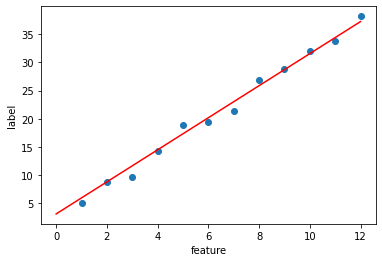

In [22]:
# Plot the regression model
def plot_model():
  plt.xlabel("feature")
  plt.ylabel("label")
  plt.scatter(features, labels)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = bias
  x1 = features[-1]
  y1 = bias + weight*x1

  plt.plot([x0, x1], [y0, y1], c='r')
  plt.show()
plot_model()

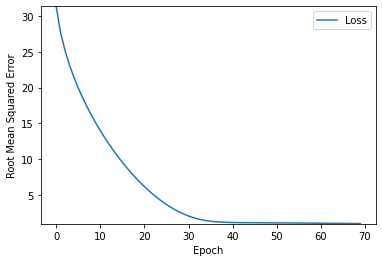

In [23]:
# Plot the loss curve (loss vs epoch)
def plot_loss():
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")
  plt.plot(completed_epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()
plot_loss()

Epoch 1/125
12/12 [==============================] - 0s 1ms/step - loss: 1.2655 - root_mean_squared_error: 1.1249
Epoch 2/125
12/12 [==============================] - 0s 1ms/step - loss: 1.1789 - root_mean_squared_error: 1.0858
Epoch 3/125
12/12 [==============================] - 0s 961us/step - loss: 1.4367 - root_mean_squared_error: 1.1986
Epoch 4/125
12/12 [==============================] - 0s 965us/step - loss: 1.1608 - root_mean_squared_error: 1.0774
Epoch 5/125
12/12 [==============================] - 0s 1ms/step - loss: 1.3516 - root_mean_squared_error: 1.1626
Epoch 6/125
12/12 [==============================] - 0s 1ms/step - loss: 1.3110 - root_mean_squared_error: 1.1450
Epoch 7/125
12/12 [==============================] - 0s 1ms/step - loss: 1.1334 - root_mean_squared_error: 1.0646
Epoch 8/125
12/12 [==============================] - 0s 1ms/step - loss: 1.1443 - root_mean_squared_error: 1.0697
Epoch 9/125
12/12 [==============================] - 0s 1ms/step - loss: 1.1558 - ro

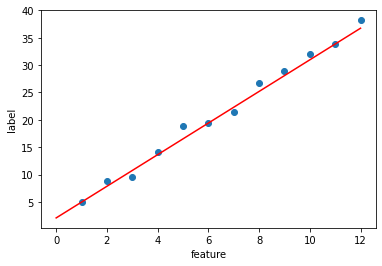

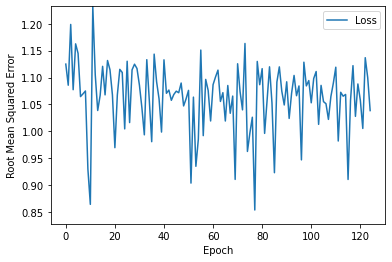

In [24]:
# Impact of the batch size
epochs = 125
batch_size = 1
learning_rate = 0.05
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=learning_rate), loss="mean_squared_error", metrics=[tf.keras.metrics.RootMeanSquaredError()])
history = model.fit(x=features, y=labels, batch_size=batch_size, epochs=epochs)
weight = model.get_weights()[0]
bias = model.get_weights()[1]
completed_epochs = history.epoch
history_per_epoch = pd.DataFrame(history.history)
rmse = history_per_epoch["root_mean_squared_error"]
plot_model()
plot_loss()